In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
import os
from pandas import to_datetime

In [2]:
data_2019 = pd.read_excel(r'C:\Users\USER\Paper\2019.xlsx')
data_2020 = pd.read_excel(r'C:\Users\USER\Paper\2020.xlsx')
data_2021 = pd.read_excel(r'C:\Users\USER\Paper\2021.xlsx')
data_2022 = pd.read_excel(r'C:\Users\USER\Paper\2022.xlsx')

In [3]:
data = pd.concat([data_2019, data_2020,data_2021,data_2022]).reset_index(drop=True)

In [4]:
df = data.rename(columns={'年月日':'Date',
                          '開盤價(元)':'Open',
                          '最高價(元)':'High',
                          '最低價(元)':'Low',
                          '收盤價(元)':'Close',})

In [5]:
df_drop = df.drop_duplicates('代號',keep='first').reset_index(drop=True)
df_drop['代號'].values

array(['Y9999', 'OTC99', '1101', ..., '6859', '6874', '8227'],
      dtype=object)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
'''
code_draw = []
for code in df_drop['代號'].values:
    data = df[df['代號']==code].reset_index(drop=True) 
    for i in range(len(data)-120):
        stock = data[i:i+120]   
        if (stock['Low'].min() /  stock['High'].max() - 1) <= -0.5 and (code not in code_draw):
            code_draw.append(code)
'''

"\ncode_draw = []\nfor code in df_drop['代號'].values:\n    data = df[df['代號']==code].reset_index(drop=True) \n    for i in range(len(data)-120):\n        stock = data[i:i+120]   \n        if (stock['Low'].min() /  stock['High'].max() - 1) <= -0.5 and (code not in code_draw):\n            code_draw.append(code)\n"

In [8]:
#len(code_draw)

C:\Users\USER\AppData\Local\Temp\ipykernel_6956\1859707519.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(width_in, height_in), tight_layout=True)


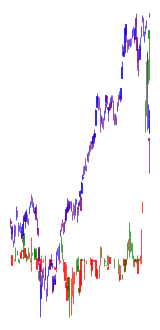

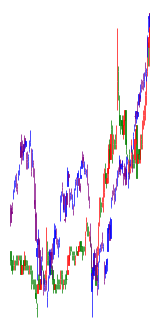

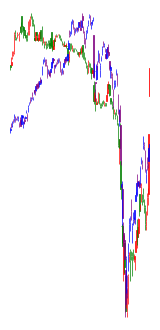

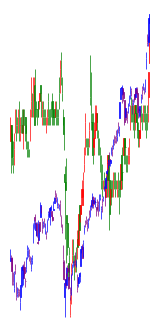

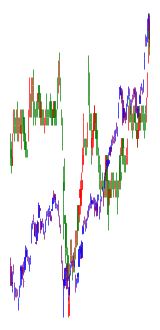

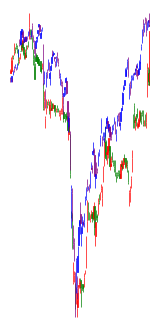

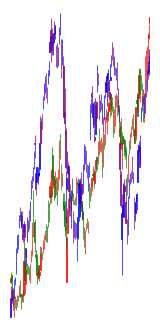

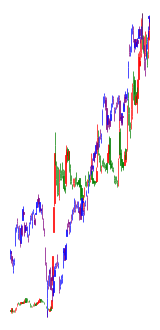

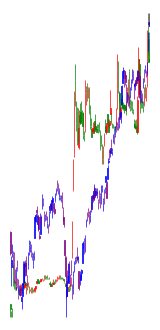

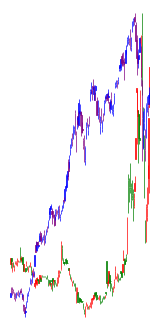

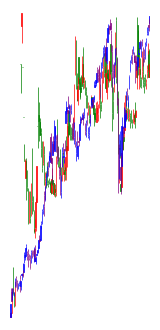

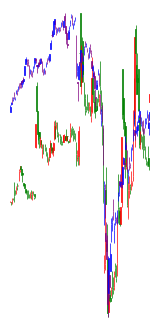

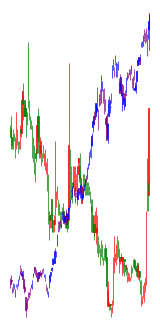

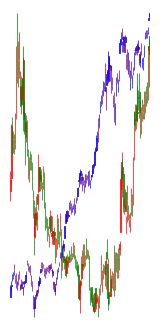

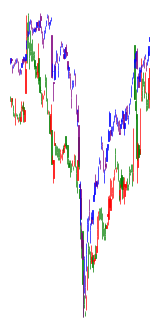

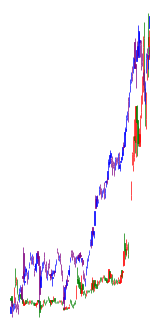

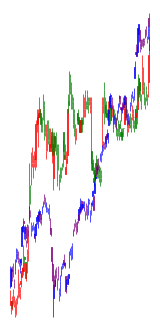

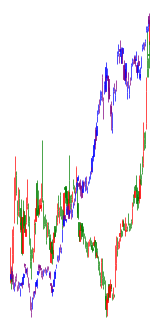

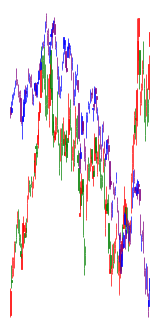

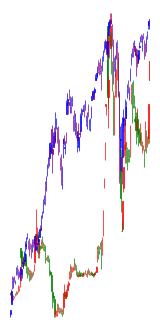

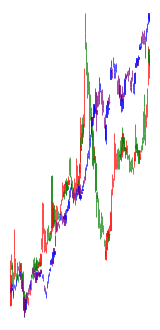

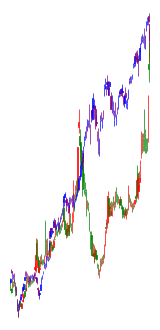

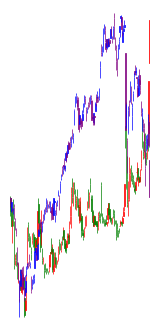

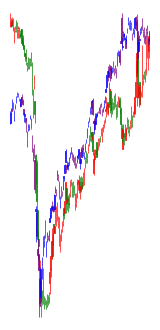

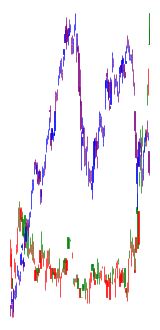

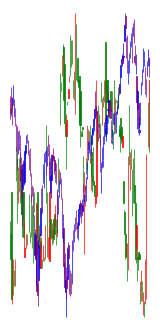

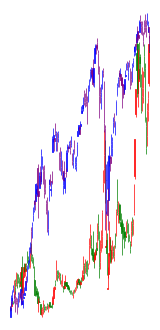

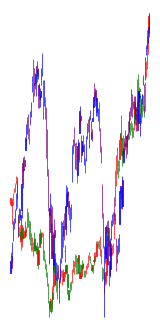

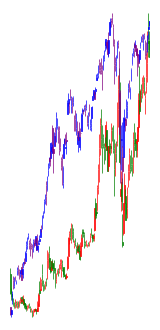

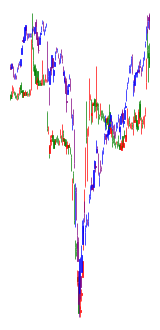

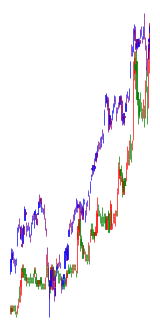

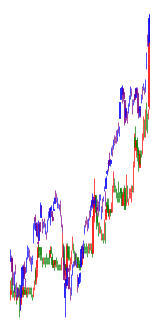

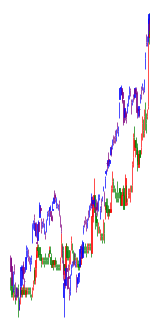

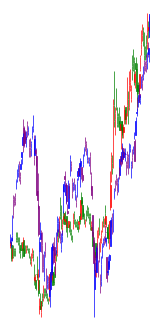

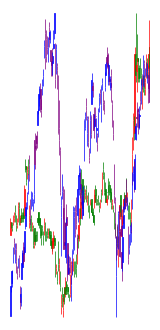

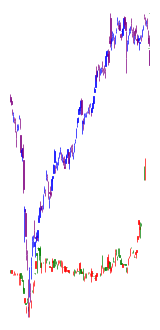

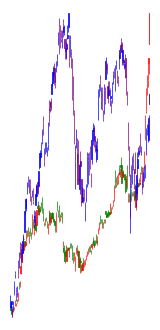

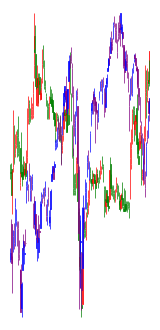

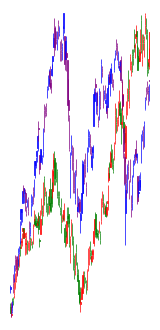

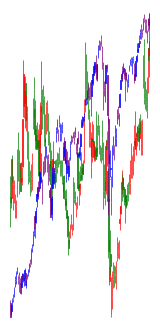

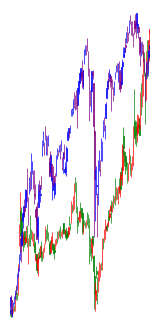

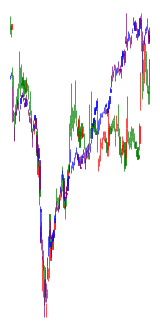

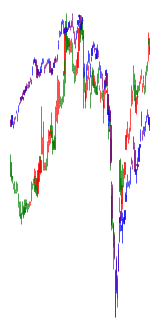

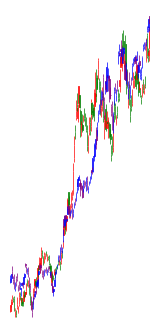

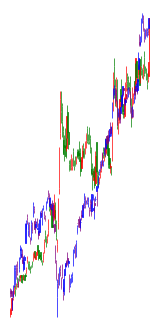

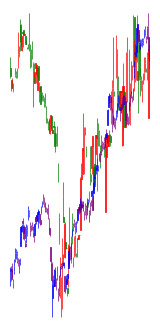

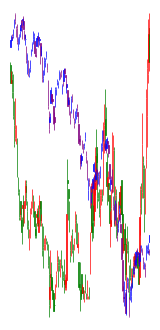

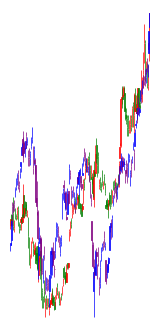

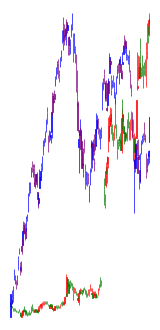

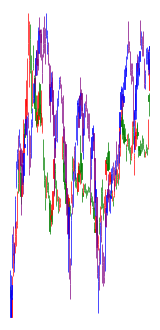

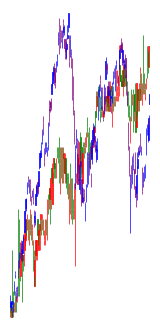

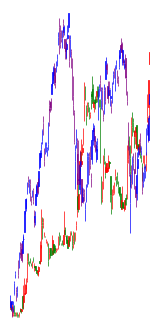

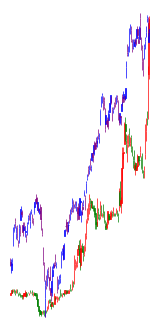

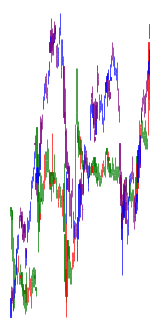

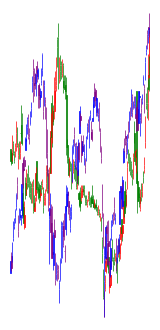

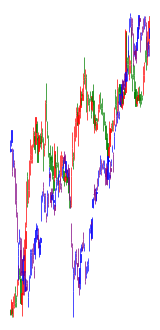

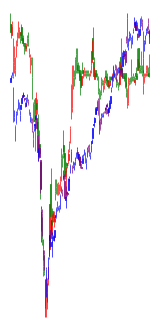

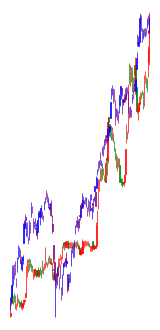

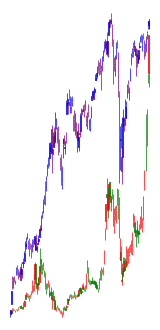

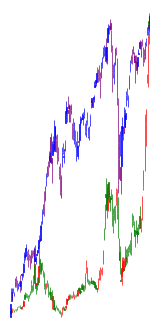

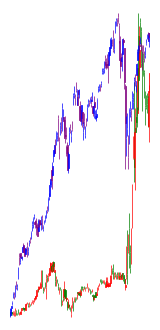

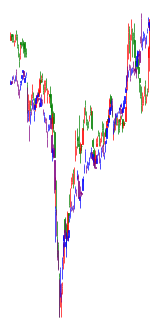

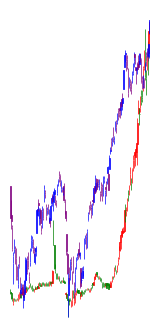

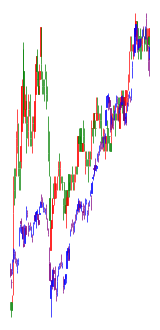

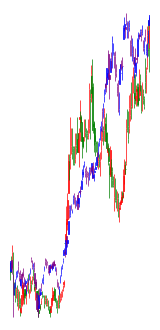

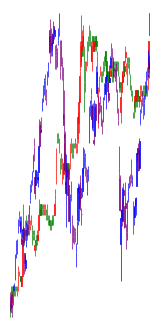

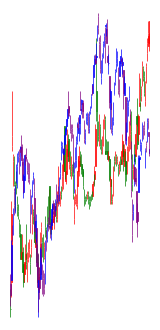

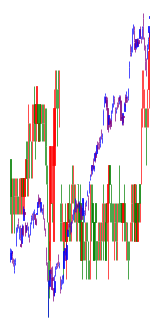

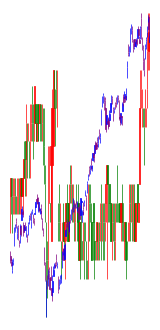

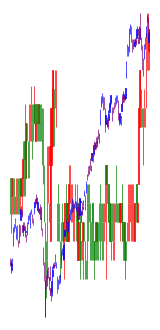

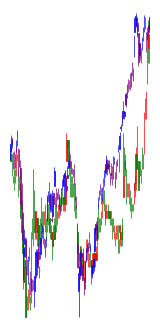

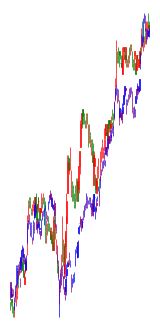

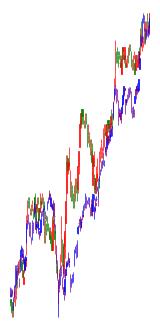

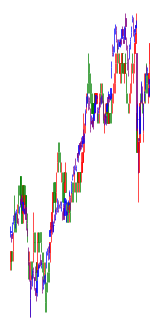

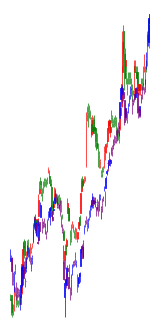

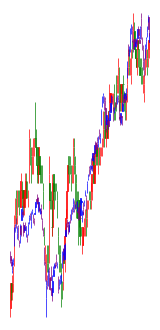

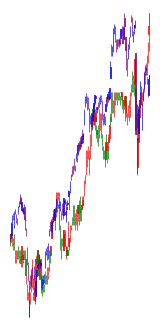

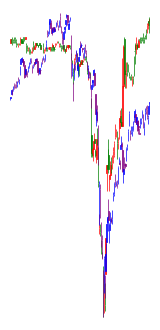

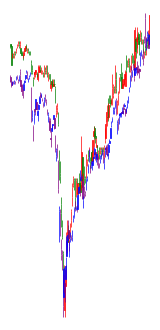

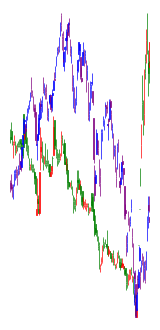

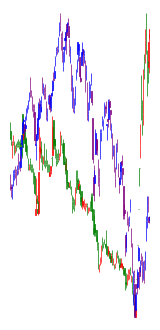

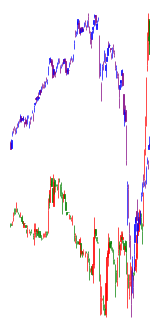

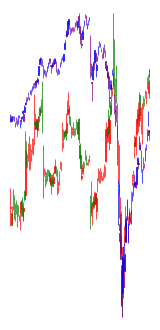

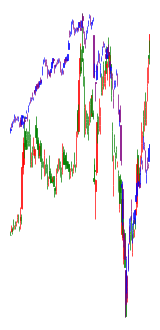

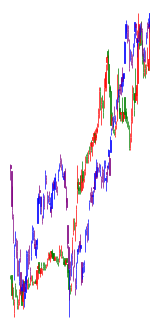

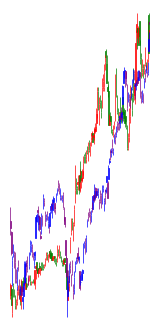

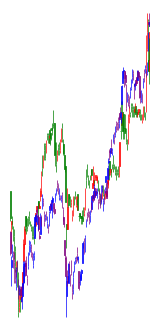

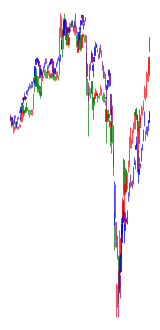

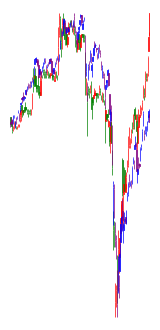

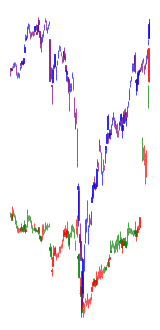

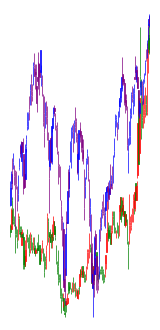

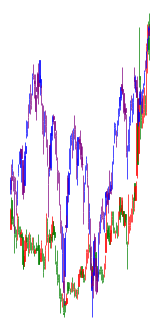

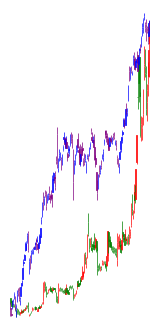

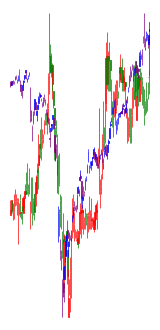

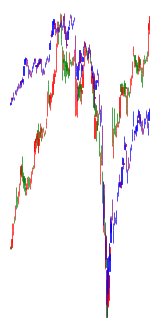

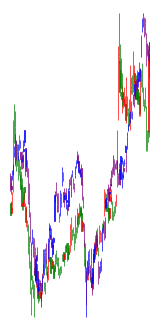

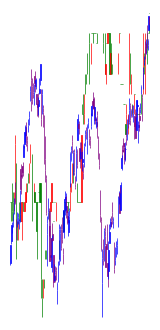

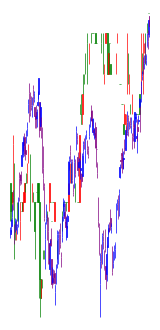

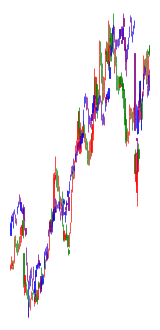

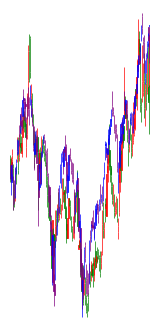

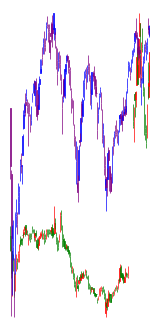

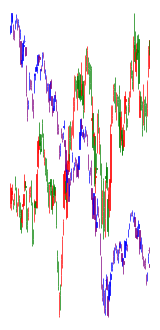

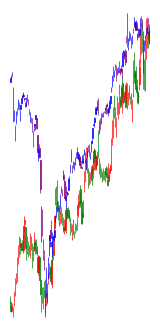

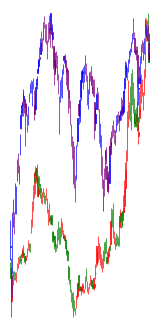

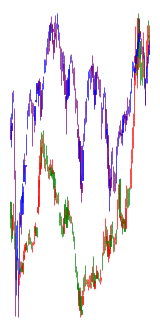

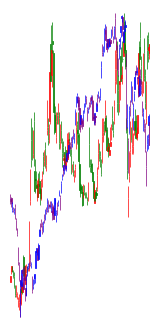

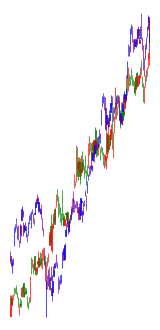

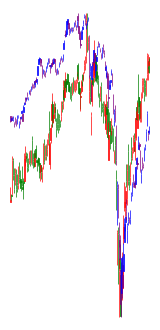

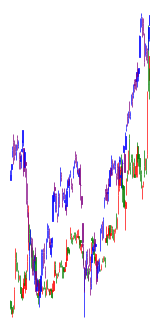

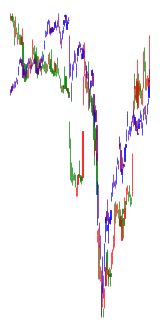

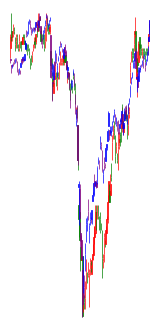

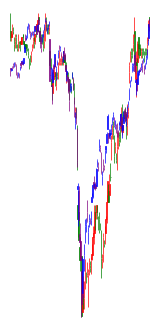

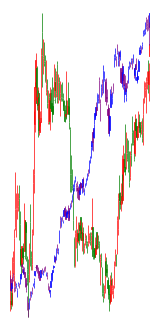

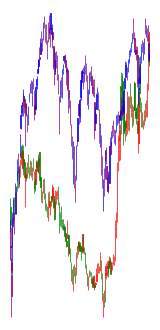

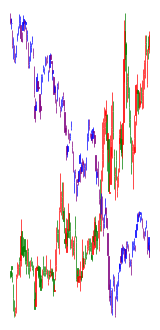

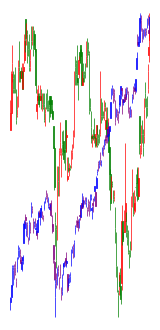

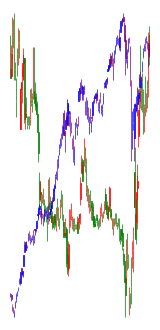

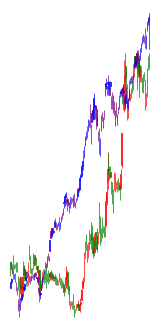

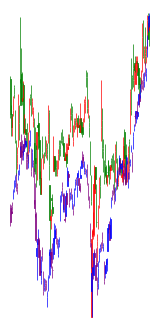

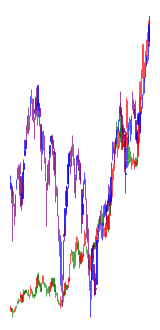

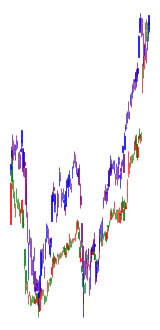

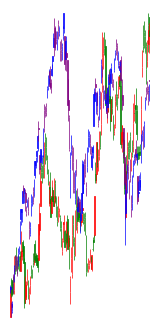

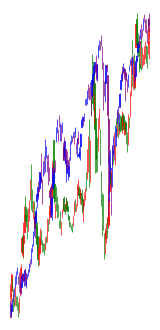

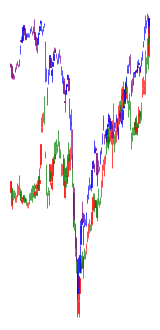

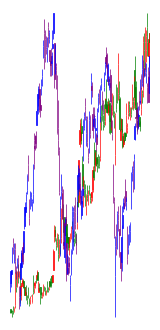

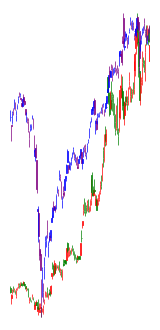

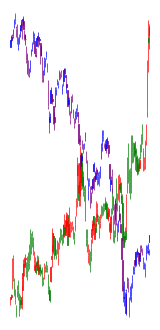

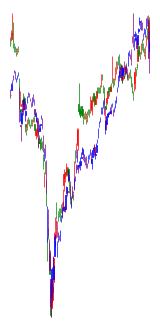

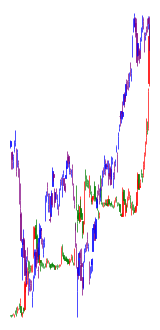

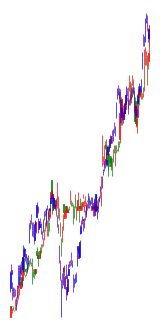

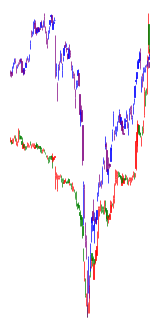

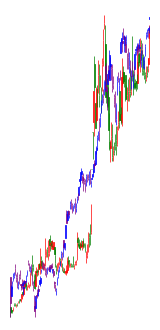

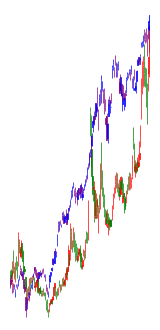

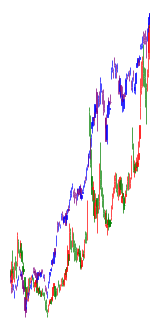

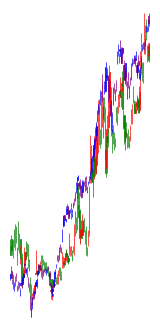

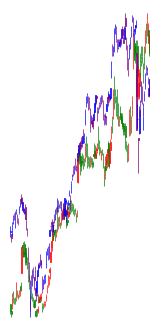

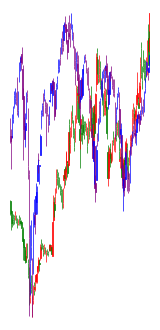

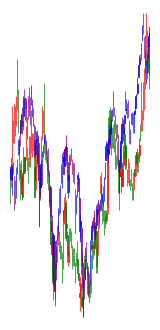

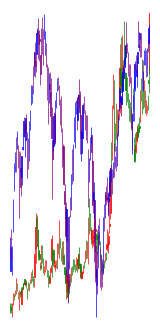

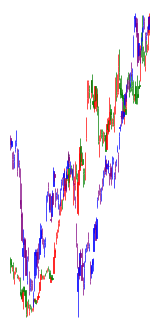

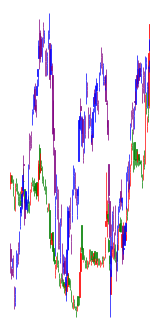

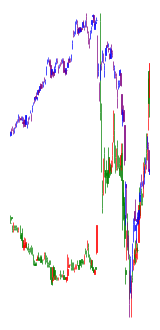

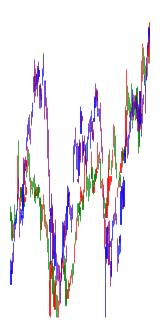

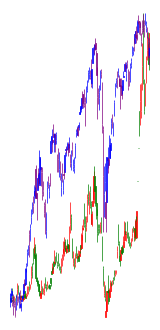

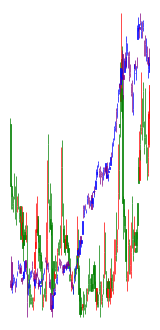

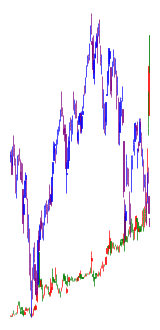

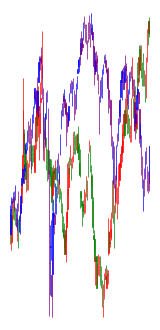

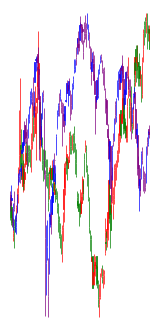

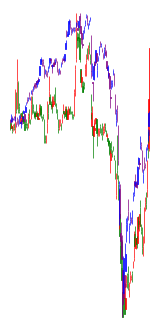

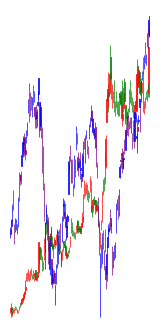

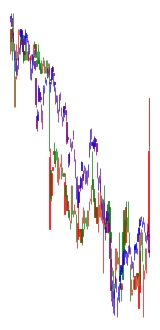

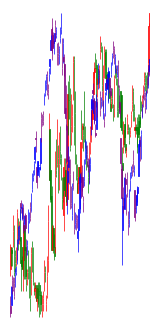

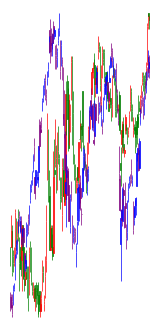

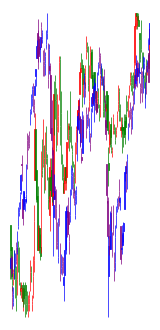

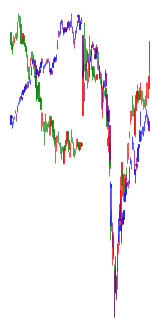

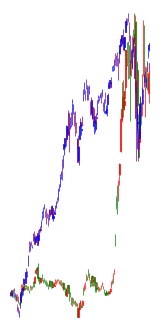

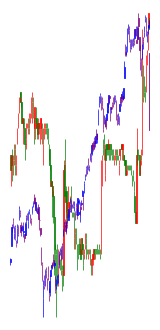

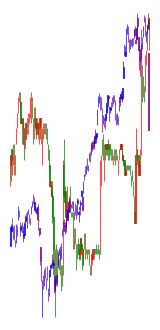

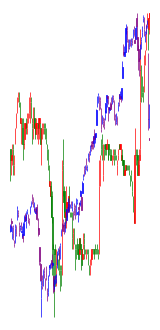

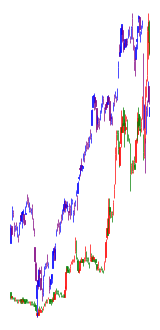

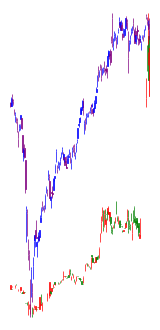

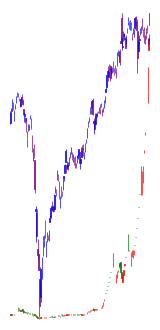

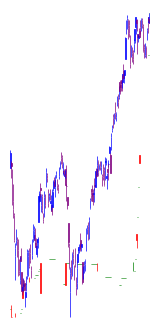

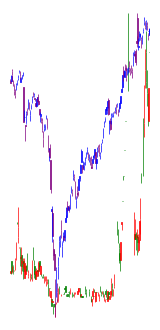

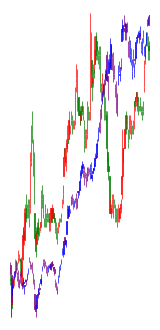

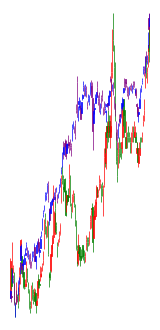

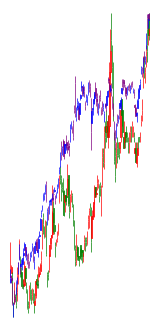

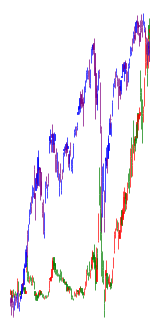

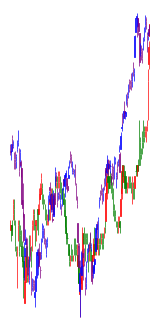

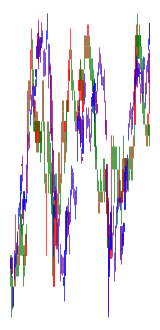

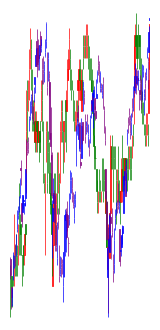

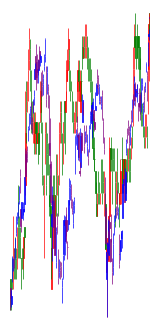

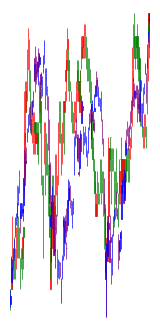

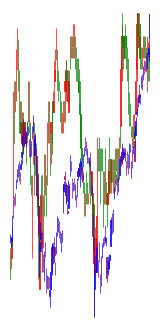

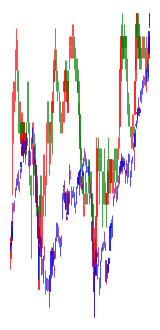

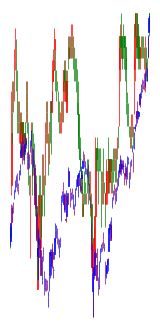

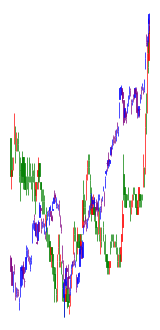

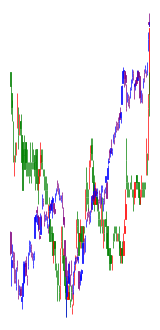

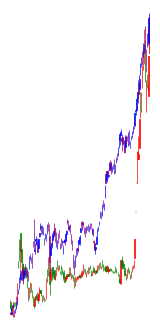

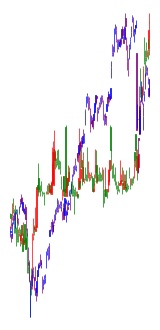

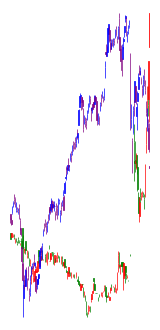

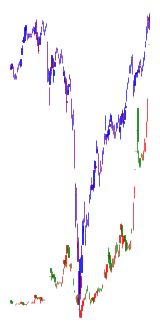

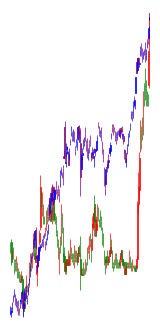

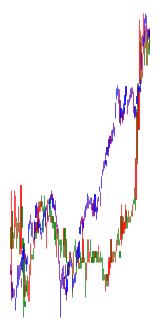

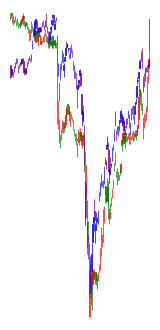

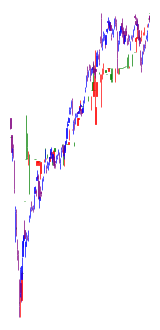

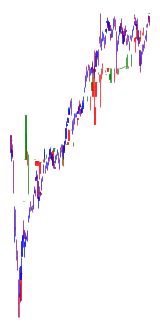

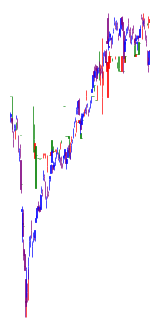

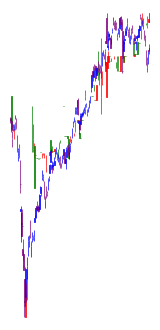

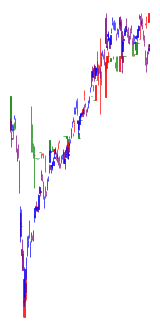

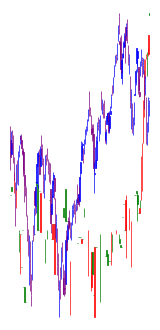

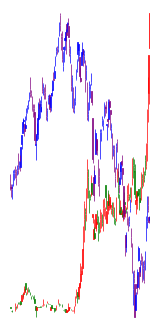

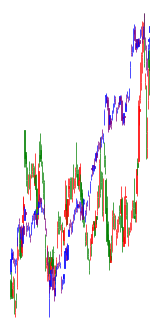

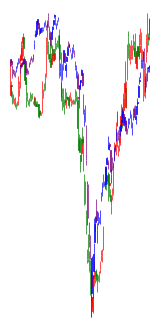

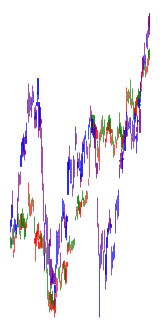

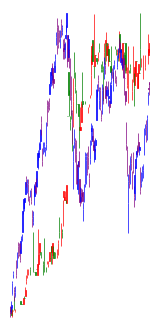

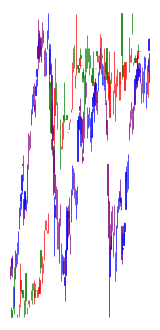

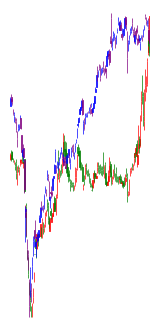

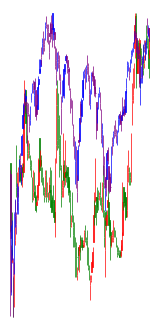

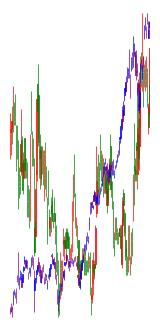

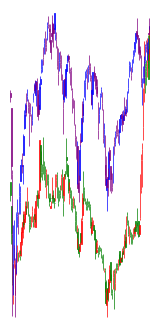

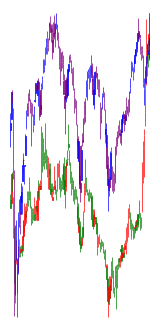

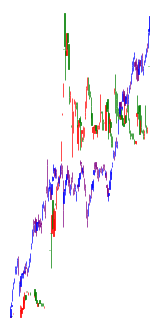

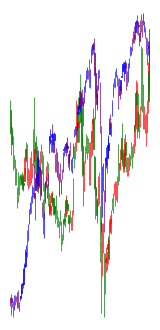

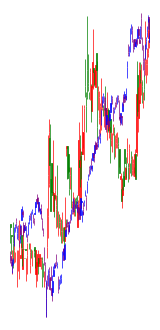

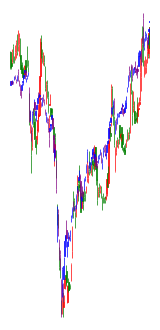

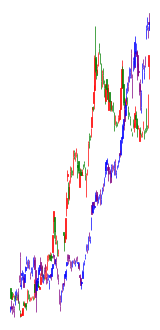

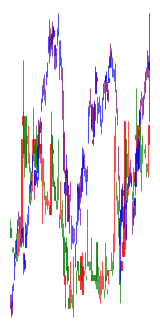

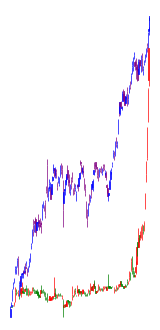

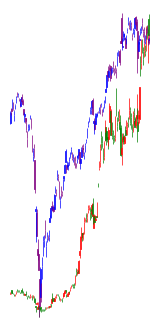

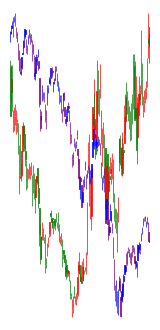

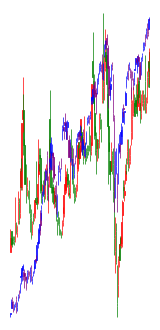

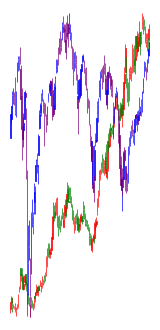

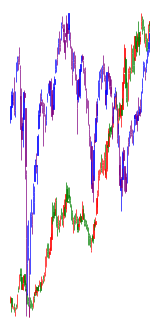

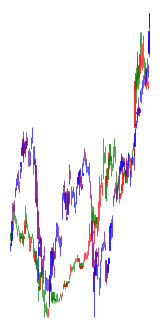

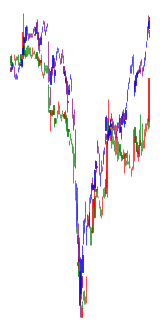

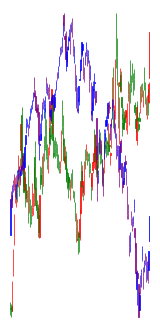

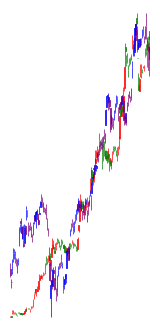

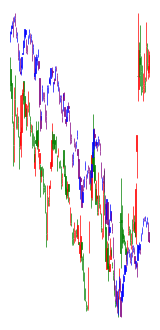

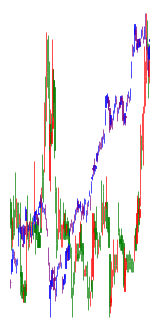

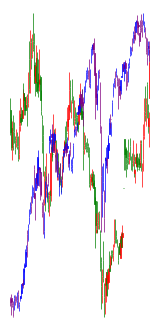

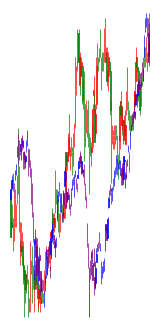

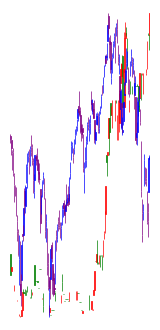

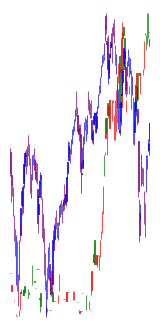

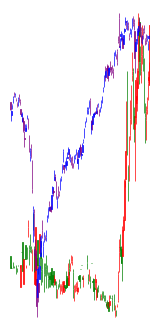

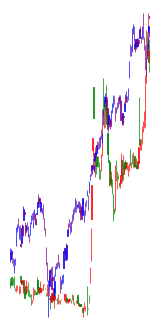

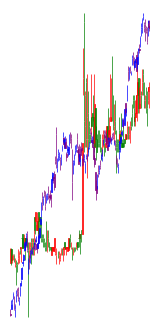

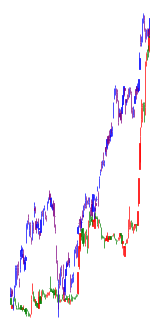

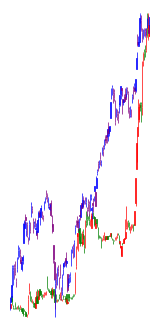

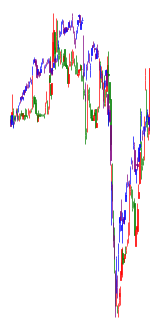

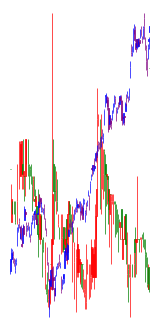

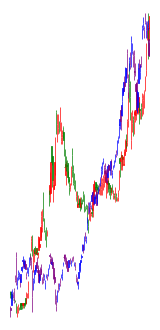

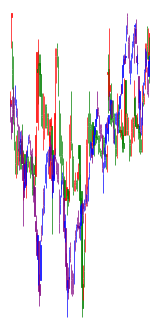

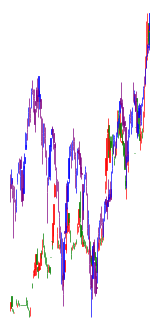

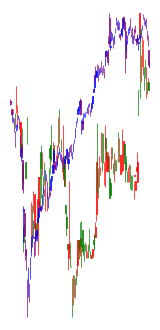

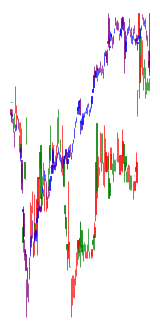

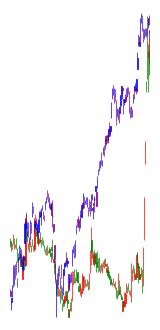

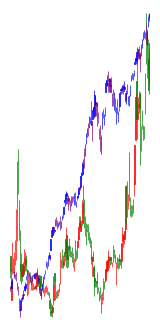

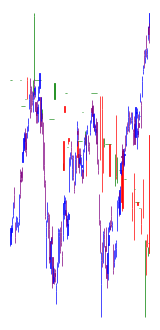

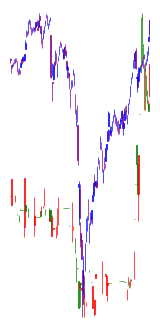

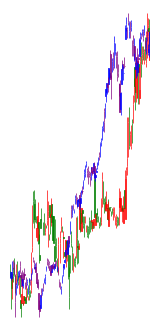

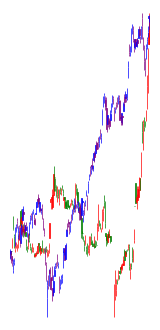

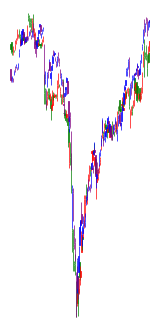

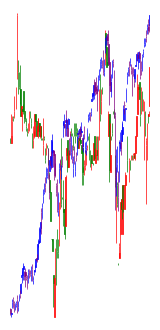

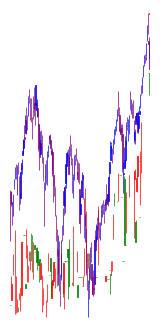

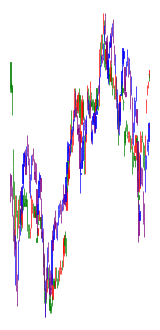

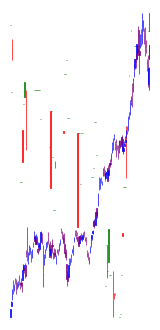

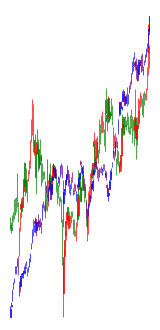

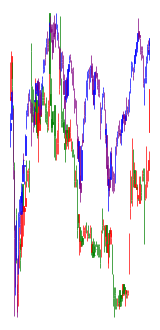

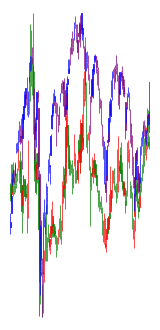

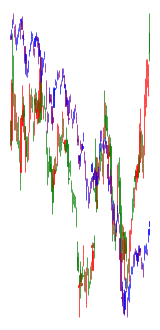

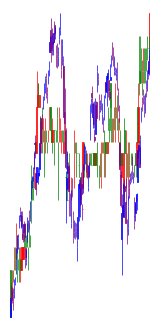

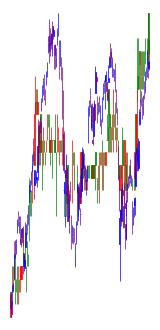

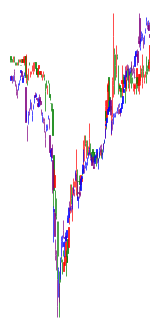

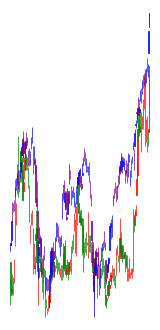

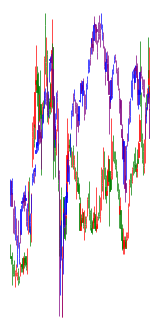

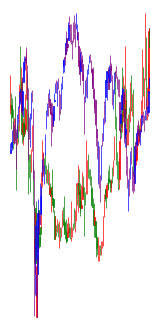

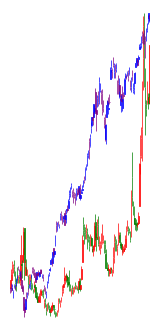

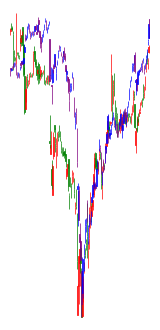

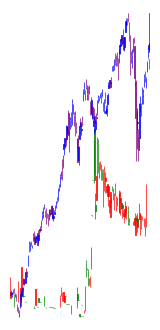

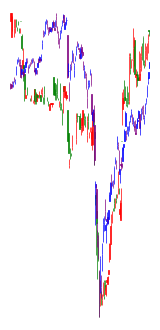

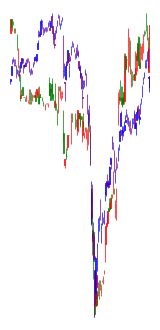

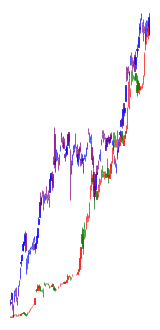

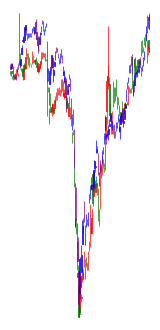

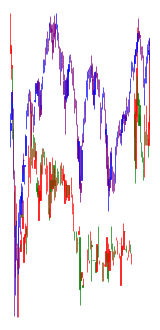

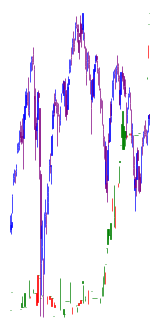

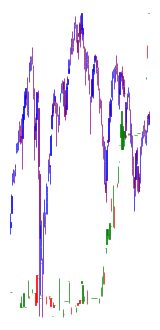

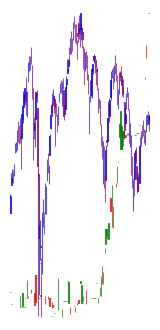

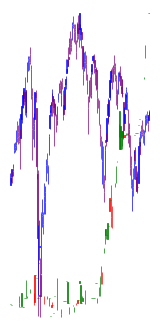

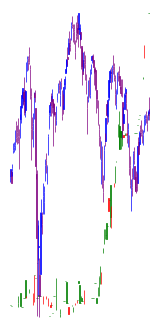

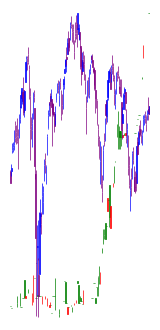

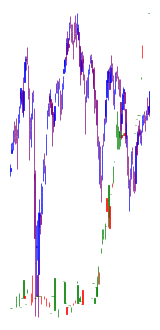

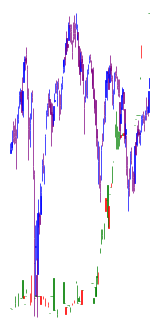

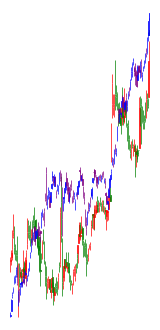

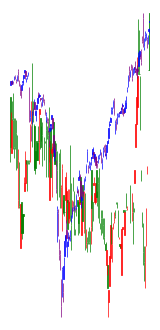

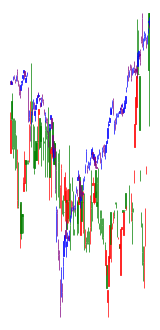

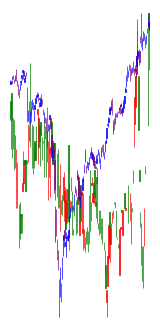

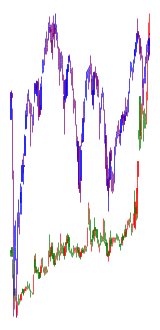

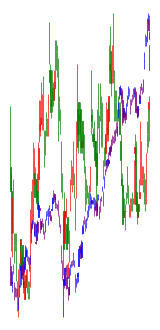

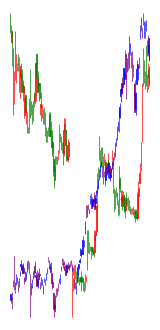

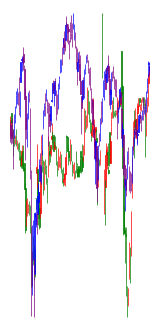

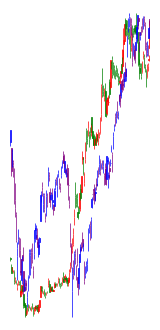

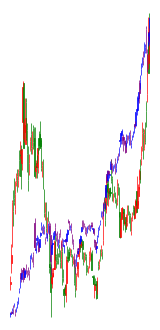

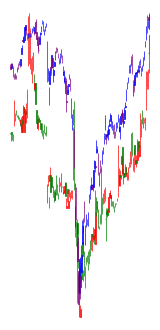

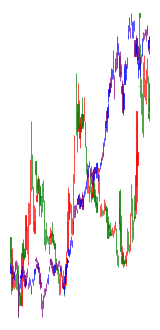

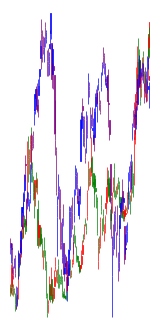

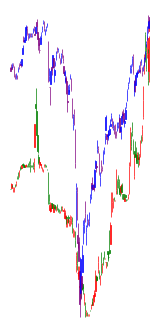

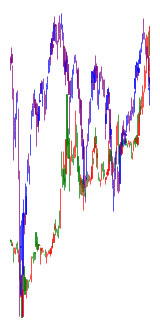

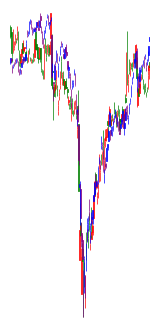

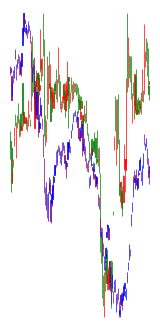

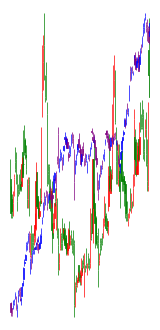

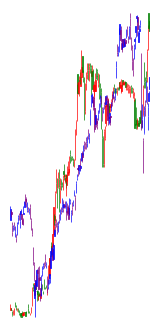

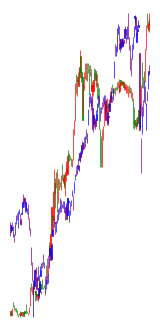

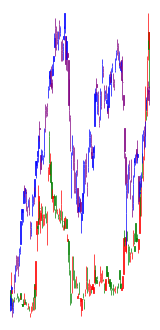

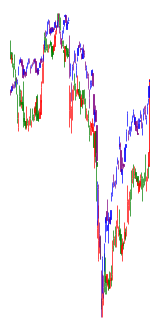

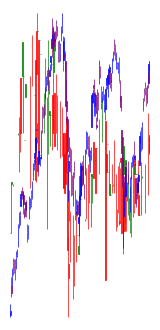

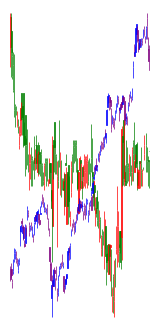

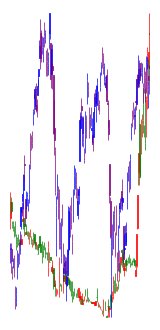

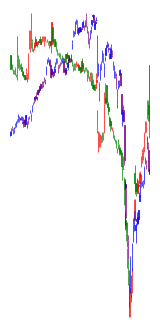

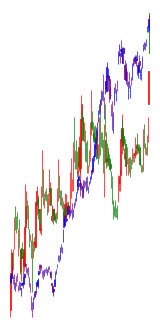

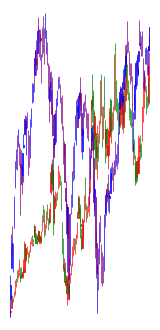

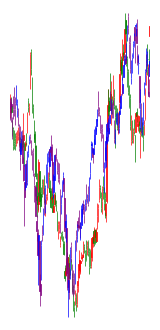

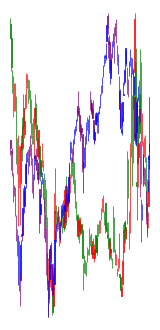

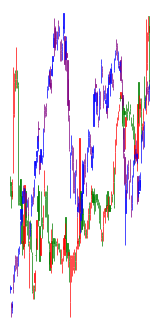

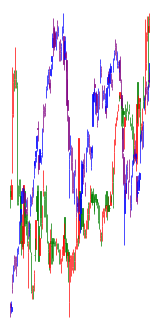

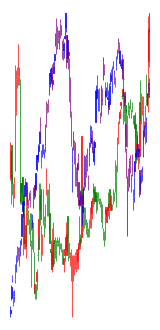

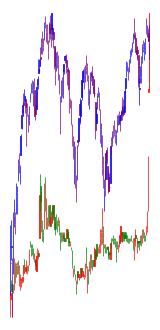

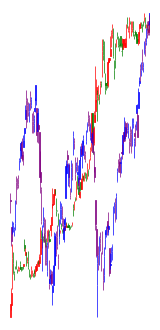

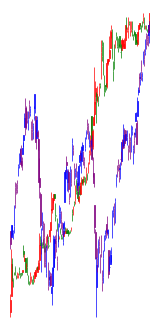

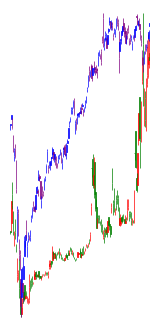

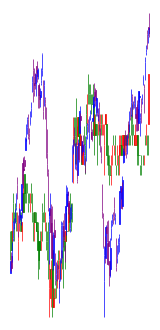

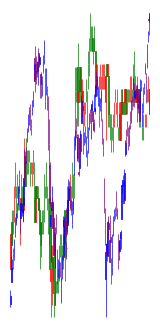

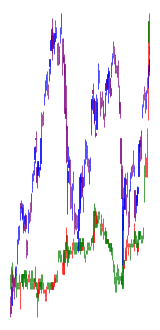

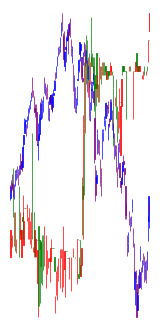

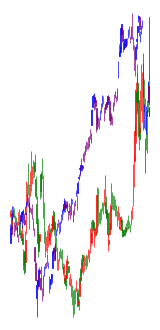

In [9]:

drawn_stocks = []
figure_paths = []
upper = 350
lower = 0

width_in = 170 / 100
height_in = 340 / 100

index_df = df[df['代號'] == 'Y9999'].reset_index(drop=True) 
for code in df_drop['代號'].values:
    draw_df = df[df['代號'] == code].reset_index(drop=True) 

    for i in range(len(draw_df)-150):
        
        stock = draw_df[i:i+120]
        idx = index_df[i:i+120]
        stock = stock.iloc[:,2:].reset_index(drop=True)
        idx = idx.iloc[:,2:].reset_index(drop=True)
        
        for j in range(len(draw_df.index[draw_df['High'] == stock['High'].max()])):
            max_loc = draw_df.index[draw_df['High'] == stock['High'].max()][j]
            min_loc = max_loc - 150

            
            if (stock['Low'].min()/stock['High'].max()-1)<=-0.3 and (stock['High'].idxmax()<stock['Low'].idxmin()):

                draw = draw_df[min_loc:max_loc].set_index('Date')                
                draw_idx = index_df[min_loc:max_loc].set_index('Date') 
                
                if draw['High'].max() != draw_df['High'].loc[max_loc]:
                    continue 
                if any(draw.equals(existing_draw) for existing_draw in drawn_stocks):
                    continue
                else:

                    if len(draw) == 150:
                        if not os.path.exists(code):
                            os.makedirs(code)
                        fig, ax1 = plt.subplots(figsize=(width_in, height_in), tight_layout=True)                            
                        mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
                        s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
                        mc_idx = mpf.make_marketcolors(up='b', down='purple', inherit=True)
                        s_idx  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc_idx)                        
                                                
                        fig_path = os.path.join(code, f"{code}_{i}.png")
                        
                        mpf.plot(draw,
                            type='candle',
                            volume=False,
                            ax=ax1,
                            tight_layout=True,
                            style=s,
                            axisoff = True)
                        
                        ax2 = ax1.twinx()                        
                        mpf.plot(draw_idx,
                            type='candle',
                            volume=False,
                            ax=ax2,
                            tight_layout=True,
                            style=s_idx,
                            axisoff = True) 
                        
                        ax1.axis('off')
                        ax2.axis('off')                        
                        plt.savefig(fig_path)                        
                        figure_paths.append(fig_path)

                drawn_stocks.append(draw)
             

In [10]:
'''
drawn_stocks = []
figure_paths = []
upper = 350
lower = 0

width_in = 170 / 100
height_in = 340 / 100

index_df = df[df['代號'] == 'Y9999'].reset_index(drop=True) 
draw_df = df[df['代號'] == '1213'].reset_index(drop=True) 

for i in range(len(draw_df)-120):
        
        idx = index_df[i:i+120]
        stock = draw_df[i:i+120]
        idx = idx.iloc[:,2:].reset_index(drop=True)
        stock = stock.iloc[:,2:].reset_index(drop=True)
        for j in range(len(draw_df.index[draw_df['High'] == stock['High'].max()])):
            max_loc = draw_df.index[draw_df['High'] == stock['High'].max()][j]
            min_loc = max_loc - 120

            
            if (stock['Low'].min()/stock['High'].max()-1)<=-0.3 and (stock['High'].idxmax()<stock['Low'].idxmin()):

                draw = draw_df[min_loc:max_loc].set_index('Date')                
                draw_idx = index_df[min_loc:max_loc].set_index('Date')
                
                if draw['High'].max() != draw_df['High'].loc[max_loc]:
                    continue 
                if any(draw.equals(existing_draw) for existing_draw in drawn_stocks):
                    continue
                else:

                    if len(draw) == 120:
                        if not os.path.exists('1213'):
                            os.makedirs('1213')
                        fig, ax1 = plt.subplots(figsize=(width_in, height_in), tight_layout=True)
                       
                        mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
                        s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
                        mc_idx = mpf.make_marketcolors(up='g', down='r', inherit=True)
                        s_idx  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc_idx)
                        
                        fig_path = os.path.join('1213', f"{'1213'}_{i}.png")

                        mpf.plot(draw, 
                            type='candle',
                            volume=False,
                            ax=ax1,
                            tight_layout=True,
                            style=s,
                            axisoff = True) 
                        
                        ax2 = ax1.twinx()
                        mpf.plot(draw_idx, 
                            type='candle',
                            volume=False,
                            ax=ax2,
                            tight_layout=True,
                            style=s_idx,
                            axisoff = True)   
                        ax1.axis('off')
                        ax2.axis('off')
                        
                        plt.savefig(fig_path)
                        figure_paths.append(fig_path)

                drawn_stocks.append(draw)    
'''                

'\ndrawn_stocks = []\nfigure_paths = []\nupper = 350\nlower = 0\n\nwidth_in = 170 / 100\nheight_in = 340 / 100\n\nindex_df = df[df[\'代號\'] == \'Y9999\'].reset_index(drop=True) \ndraw_df = df[df[\'代號\'] == \'1213\'].reset_index(drop=True) \n\nfor i in range(len(draw_df)-120):\n        \n        idx = index_df[i:i+120]\n        stock = draw_df[i:i+120]\n        idx = idx.iloc[:,2:].reset_index(drop=True)\n        stock = stock.iloc[:,2:].reset_index(drop=True)\n        for j in range(len(draw_df.index[draw_df[\'High\'] == stock[\'High\'].max()])):\n            max_loc = draw_df.index[draw_df[\'High\'] == stock[\'High\'].max()][j]\n            min_loc = max_loc - 120\n\n            \n            if (stock[\'Low\'].min()/stock[\'High\'].max()-1)<=-0.3 and (stock[\'High\'].idxmax()<stock[\'Low\'].idxmin()):\n\n                draw = draw_df[min_loc:max_loc].set_index(\'Date\')                \n                draw_idx = index_df[min_loc:max_loc].set_index(\'Date\')\n                \n      

In [11]:
figure_paths = pd.DataFrame({'File Paths': figure_paths})
figure_paths.to_csv('Loser_path.csv')